In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files

# Upload file
uploaded = files.upload()

Saving car_sales_data.csv to car_sales_data.csv


#Project Car Sales Analysis

##Data info

In [3]:
df=pd.read_csv('car_sales_data.csv')
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [5]:
df.shape

(50000, 7)

In [6]:
df.describe()

,Engine size,Year of manufacture,Mileage,Price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.773058,2004.209440,112497.320700,13828.903160
std,0.734108,9.645965,71632.515602,16416.681336
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54352.250000,3060.750000
50%,1.600000,2004.000000,100987.500000,7971.500000
75%,2.000000,2012.000000,158601.000000,19026.500000
max,5.000000,2022.000000,453537.000000,168081.000000


##Data Cleaning & Handling

In [7]:
for col in df.columns:
  pct_missing= np.mean(df[col].isnull())
  print('{} - {}%'.format(col, round(pct_missing*100)))


Manufacturer - 0%
Model - 0%
Engine size - 0%
Fuel type - 0%
Year of manufacture - 0%
Mileage - 0%
Price - 0%


##EDA & Visualization

In [8]:
df=pd.read_csv('car_sales_data.csv')
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


####Analysis of Variable Relationships

                        Price   Mileage  Engine size  Year of manufacture
Price                1.000000 -0.632692     0.398371             0.714209
Mileage             -0.632692  1.000000     0.004470            -0.807458
Engine size          0.398371  0.004470     1.000000            -0.000675
Year of manufacture  0.714209 -0.807458    -0.000675             1.000000


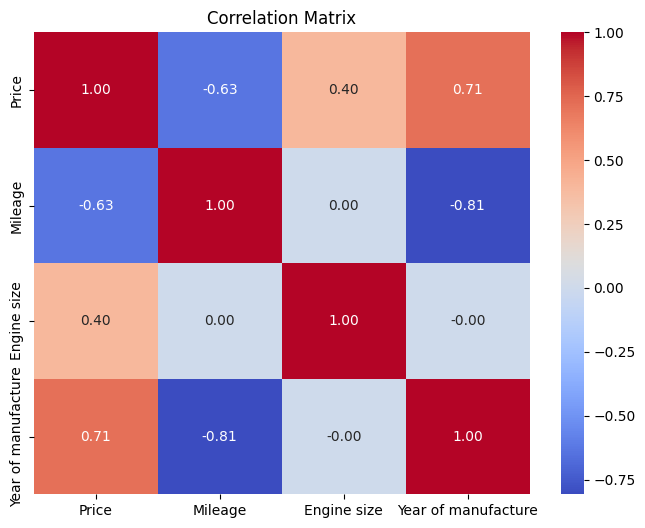

In [24]:
# Correlation coefficient
correlation_matrix = df[['Price', 'Mileage', 'Engine size', 'Year of manufacture']].corr()

print(correlation_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

/tmp/ipython-input-2939005755.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Manufacturer', y='Price', data=avg_price_manufacturer, palette='viridis')


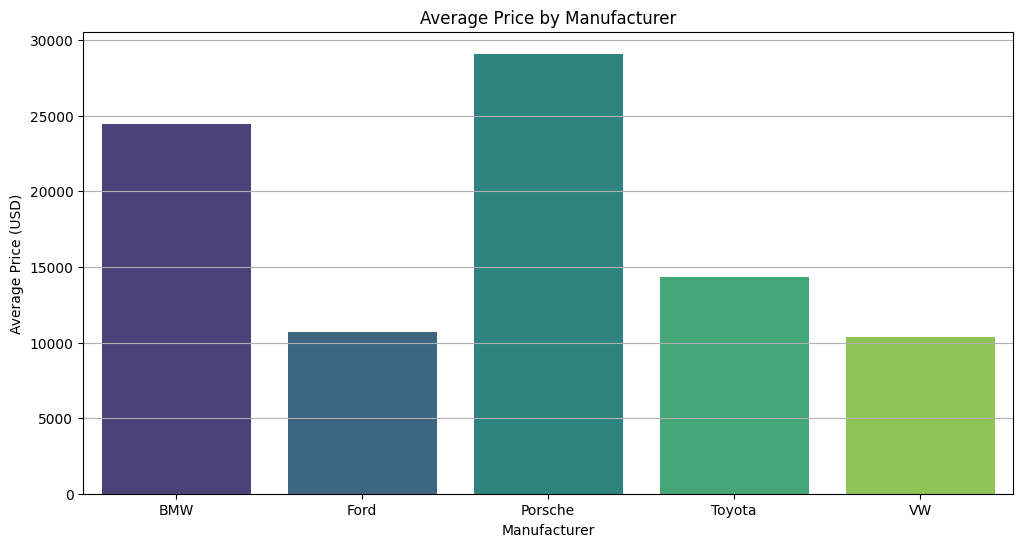

In [17]:
# Calculate average price by Manufacturer
avg_price_manufacturer = df.groupby('Manufacturer')['Price'].mean().reset_index()

# Calculate average price by Fuel type
avg_price_fuel = df.groupby('Fuel type')['Price'].mean().reset_index()

# Plot average price by Manufacturer (Bar Chart)
plt.figure(figsize=(12, 6))
sns.barplot(x='Manufacturer', y='Price', data=avg_price_manufacturer, palette='viridis')
plt.title('Average Price by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Average Price (USD)')
plt.grid(axis='y')
plt.show()

####Visualisasi Data

/tmp/ipython-input-2153850752.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fuel type', y='Price', data=df, palette='pastel')


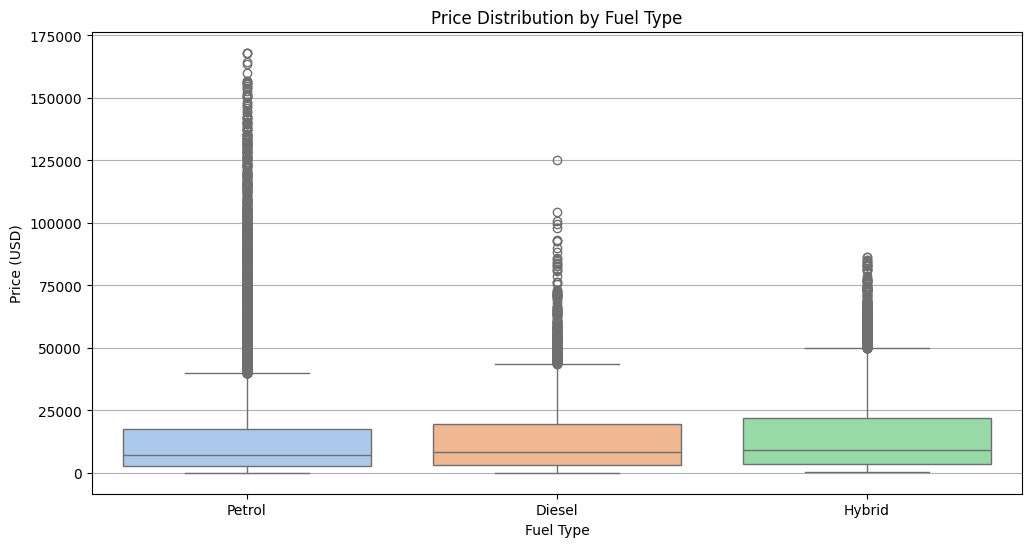

In [18]:
# Plot average price by Fuel type (Boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fuel type', y='Price', data=df, palette='pastel')
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (USD)')
plt.grid(axis='y')
plt.show()

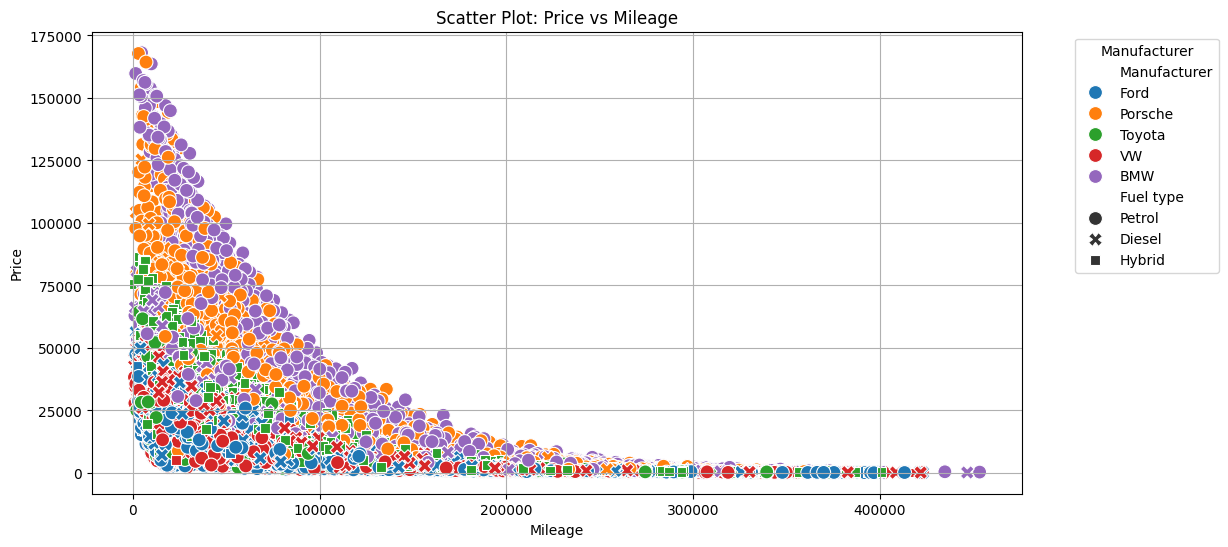

In [23]:
# Scatter Plot: Price vs Mileage
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Mileage', y='Price', data=df, hue='Manufacturer', style='Fuel type', s=100)
plt.title('Scatter Plot: Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.grid()
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

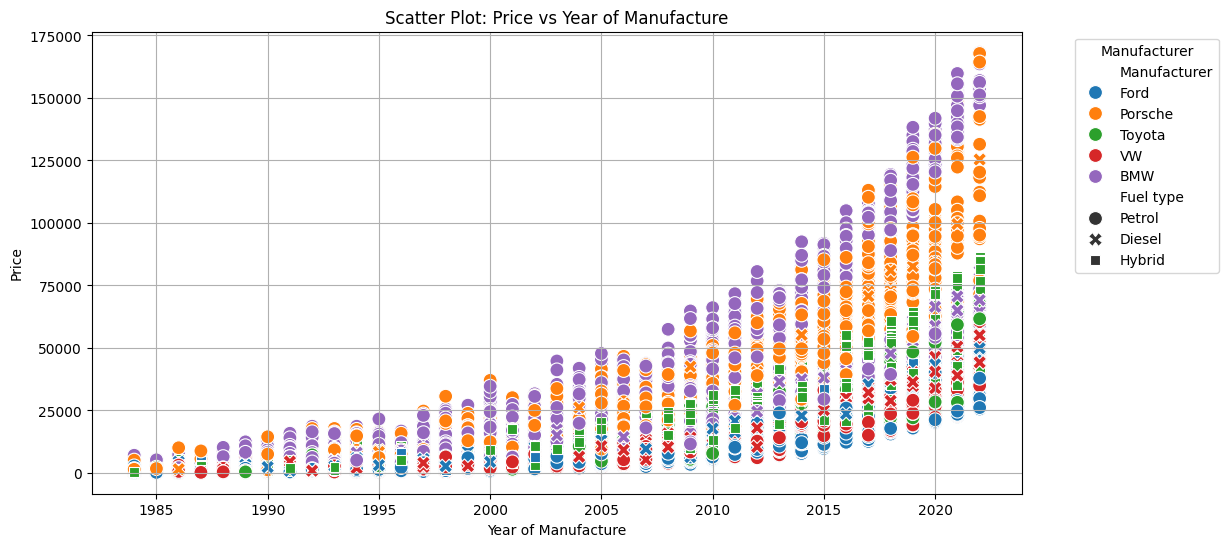

In [22]:
# Scatter Plot: Price vs Year of Manufacture
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year of manufacture', y='Price', data=df, hue='Manufacturer', style='Fuel type', s=100)
plt.title('Scatter Plot: Price vs Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Price')
plt.grid()
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

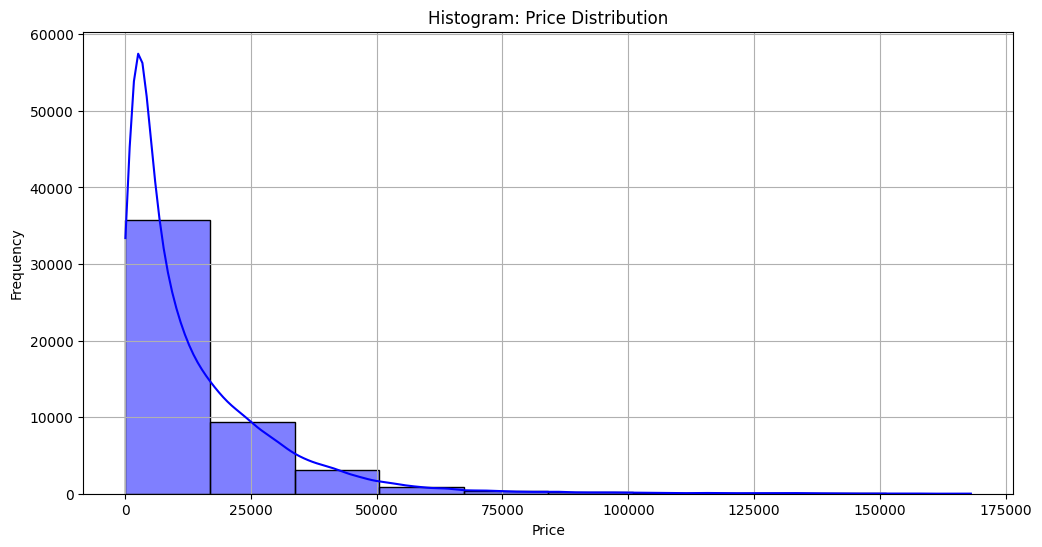

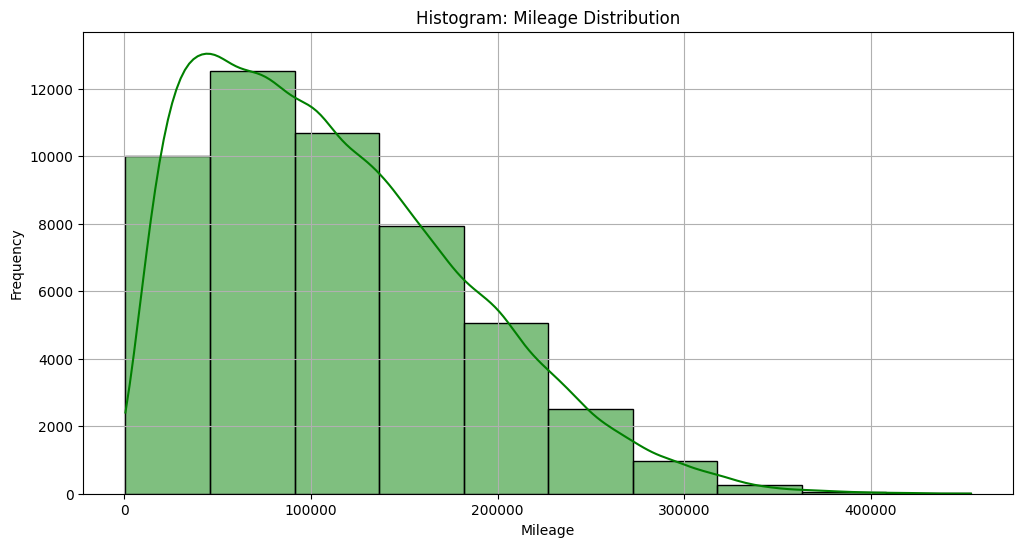

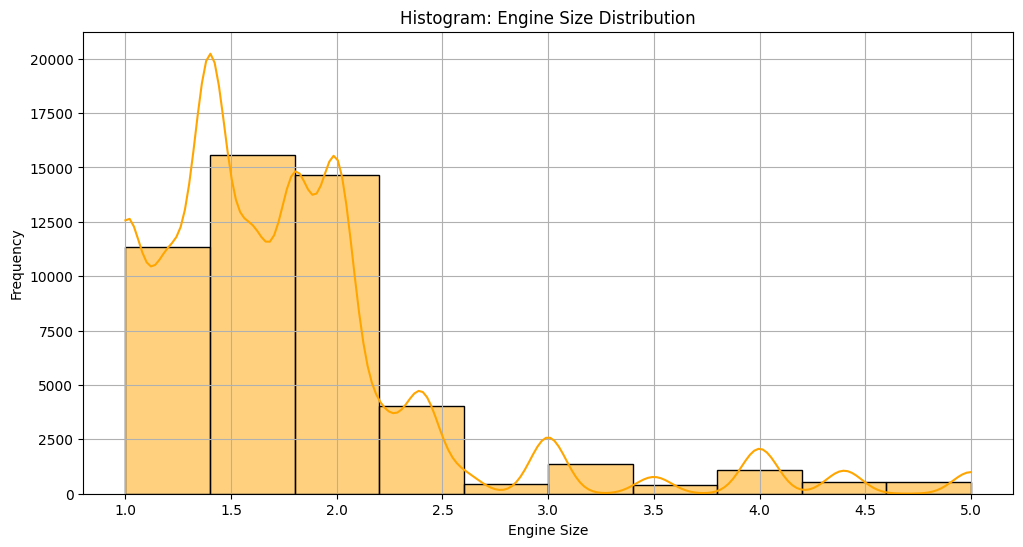

In [19]:
# Histogram: Distribution of Price
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], bins=10, kde=True, color='blue')
plt.title('Histogram: Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Histogram: Distribution of Mileage
plt.figure(figsize=(12, 6))
sns.histplot(df['Mileage'], bins=10, kde=True, color='green')
plt.title('Histogram: Mileage Distribution')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Histogram: Distribution of Engine Size
plt.figure(figsize=(12, 6))
sns.histplot(df['Engine size'], bins=10, kde=True, color='orange')
plt.title('Histogram: Engine Size Distribution')
plt.xlabel('Engine Size')
plt.ylabel('Frequency')
plt.grid()
plt.show()

/tmp/ipython-input-1372397302.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Manufacturer', data=df, palette='viridis')


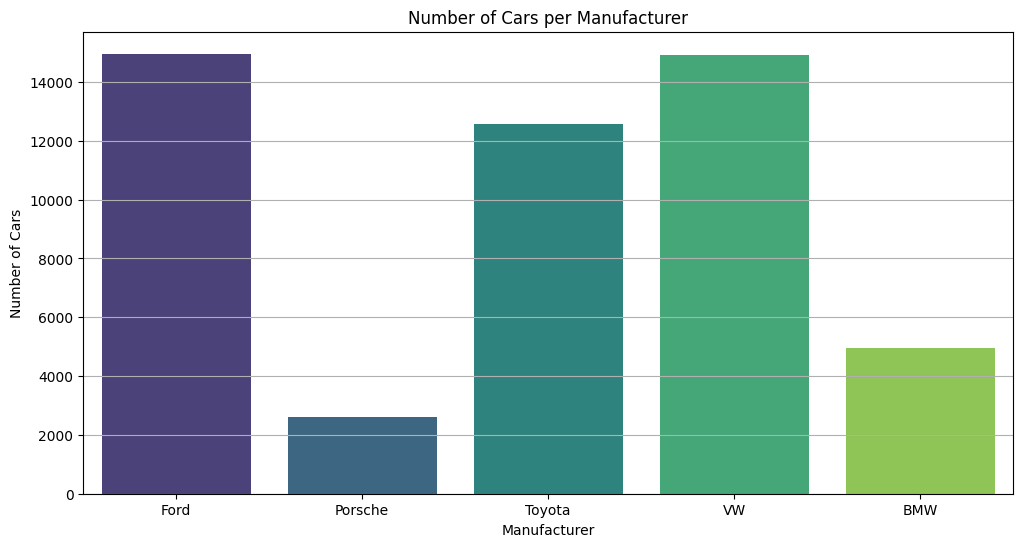

/tmp/ipython-input-1372397302.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fuel type', data=df, palette='pastel')


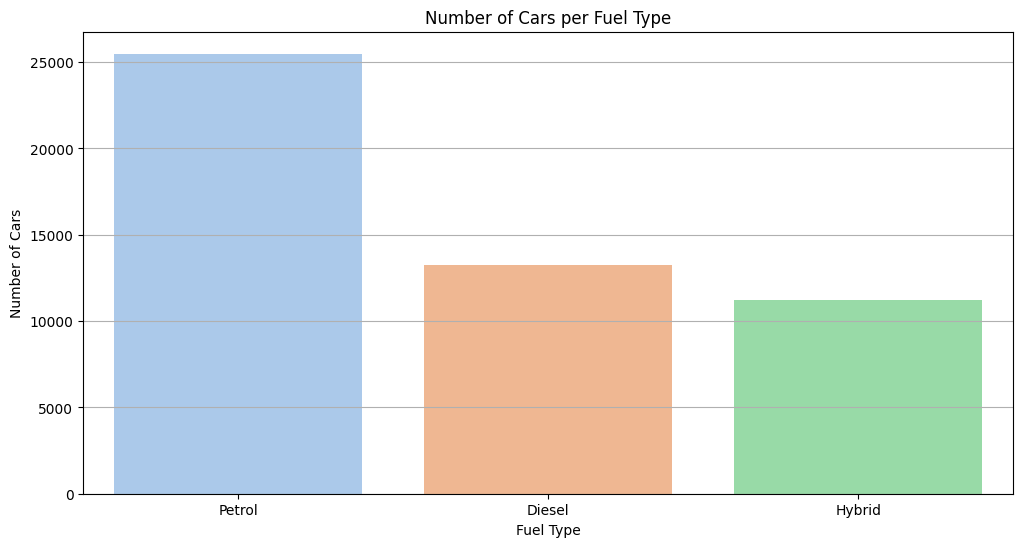

In [21]:
# Bar Chart: Number of Cars per Manufacturer
plt.figure(figsize=(12, 6))
sns.countplot(x='Manufacturer', data=df, palette='viridis')
plt.title('Number of Cars per Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Cars')
plt.grid(axis='y')
plt.show()

# Bar Chart: Number of Cars per Fuel Type
plt.figure(figsize=(12, 6))
sns.countplot(x='Fuel type', data=df, palette='pastel')
plt.title('Number of Cars per Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')
plt.grid(axis='y')
plt.show()